# Phân tích gian lận thi cử 2018 (tỉnh Hà Giang) 
---

## Các bước thực hiện:
1. Thống kê điểm thi các môn thi và các khối thi
2. Thống kê số thí sinh có điểm các khối > 27 trong tỉnh và cả nước

___Thư viện:___

In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import json

___Load dữ liệu:___

In [25]:
with open('Dataset.json') as json_file:
    provinces = json.load(json_file)
data = {}
for province in provinces:
    data[province['province']] = pd.read_csv(province['file'])
    data[province['province']].set_index('SBD')

total_data = pd.concat(list(data.values()))
data['Cả nước'] = total_data

__Hàm bổ trợ:__

In [26]:
NUM_BINS = 40
SUP_TITLE_SIZE = 30
TITLE_SIZE = 25
LABEL_SIZE = 15
PROVINCE_BAR_COLOR = '#F7C51D'
TOTAL_BAR_COLOR = '#2596BE'
HISTOGRAM_WIDTH = 30
HISTOGRAM_HEIGHT = 15
DEFAULT_PROVINCE_NAME = 'Hà Giang'
DEFAULT_RANGE = (0, 10)
DEFAULT_BINS = 40

# Count number of values in each bin
def count_values(data, bins):
    nums = []
    for i in range(1, len(bins)):
        nums.append(data[data < bins[i]].count())
    for i in range(len(nums) - 1, 0, -1):
        nums[i] = nums[i] - nums[i-1]
    return nums

# Display number of value on each bar
def display_label_each_bar(histogram, values):
    for bar, value in zip(histogram.patches, values):
        height = bar.get_height()
        histogram.text(bar.get_x() + bar.get_width()/2.0, height + 4, value, ha='center')


def set_label_and_title(histogram, x_label, y_label, title):
    histogram.set_title(title, fontsize = TITLE_SIZE)
    histogram.set_xlabel(x_label, fontsize = LABEL_SIZE)
    histogram.set_ylabel(y_label, fontsize = LABEL_SIZE)


def set_data_histogram(histogram, data, color_code, bins):
    histogram.grid(axis='y')
    histogram.hist(data, bins = bins, zorder = 2, rwidth=0.85, color = color_code)
    histogram.set_xticks(bins)
    display_label_each_bar(histogram, count_values(data, bins))


def draw_histogram(histogram, 
                    owner_name, 
                    subject_name, 
                    color_code,                     
                    bins,
                    x_label = 'Số lượng', 
                    y_label ='Điểm'):
    set_label_and_title(histogram, x_label, y_label, title=owner_name)
    set_data_histogram(histogram, data[owner_name][subject_name], color_code, bins)

# Compare 2 histogram
def draw_histogram_compare(owner_name_1, 
                            owner_name_2, 
                            subject_name, 
                            num_bins = DEFAULT_BINS,
                            x_range = DEFAULT_RANGE,
                            color_code_1 = PROVINCE_BAR_COLOR, 
                            color_code_2 = TOTAL_BAR_COLOR,
                            x_label = 'Số lượng', 
                            y_label ='Điểm'):
    bar_charts, (owner_1, owner_2) = plt.subplots(2,1)
    bar_charts.set_figheight(HISTOGRAM_HEIGHT)
    bar_charts.set_figwidth(HISTOGRAM_WIDTH)
    bar_charts.suptitle(f"Phân bố điểm thi {subject_name}", fontsize = SUP_TITLE_SIZE, fontweight = 'bold')
    
    bins = np.linspace(x_range[0], x_range[1], num_bins + 1)
    draw_histogram(owner_1, owner_name_1, subject_name, color_code_1, bins)
    draw_histogram(owner_2, owner_name_2, subject_name, color_code_2, bins)
    plt.show()

## Phân bố điểm thi các môn thi
### Toán


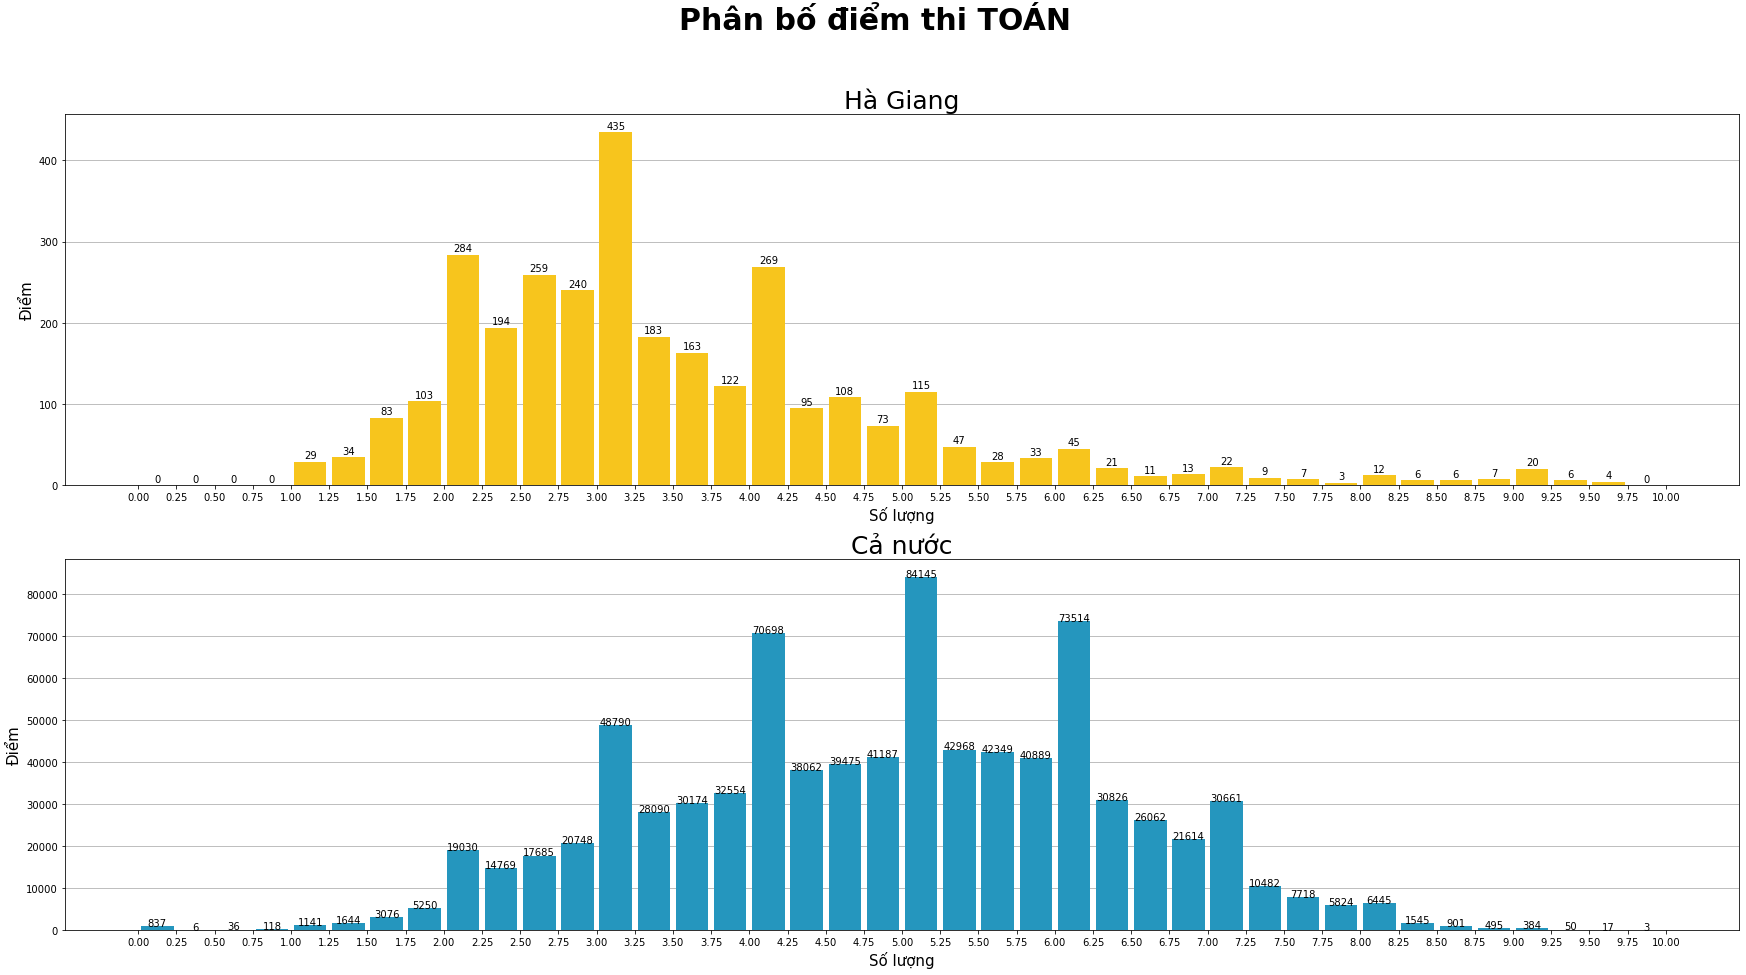

In [27]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'TOÁN')

__Nhận xét:__
- Phân bố điểm của các thí sinh của Hà Giang bị lệch trái. Chứng tỏ đa phần các học sinh Hà Giang học toán dưới trung bình.

### Ngữ văn

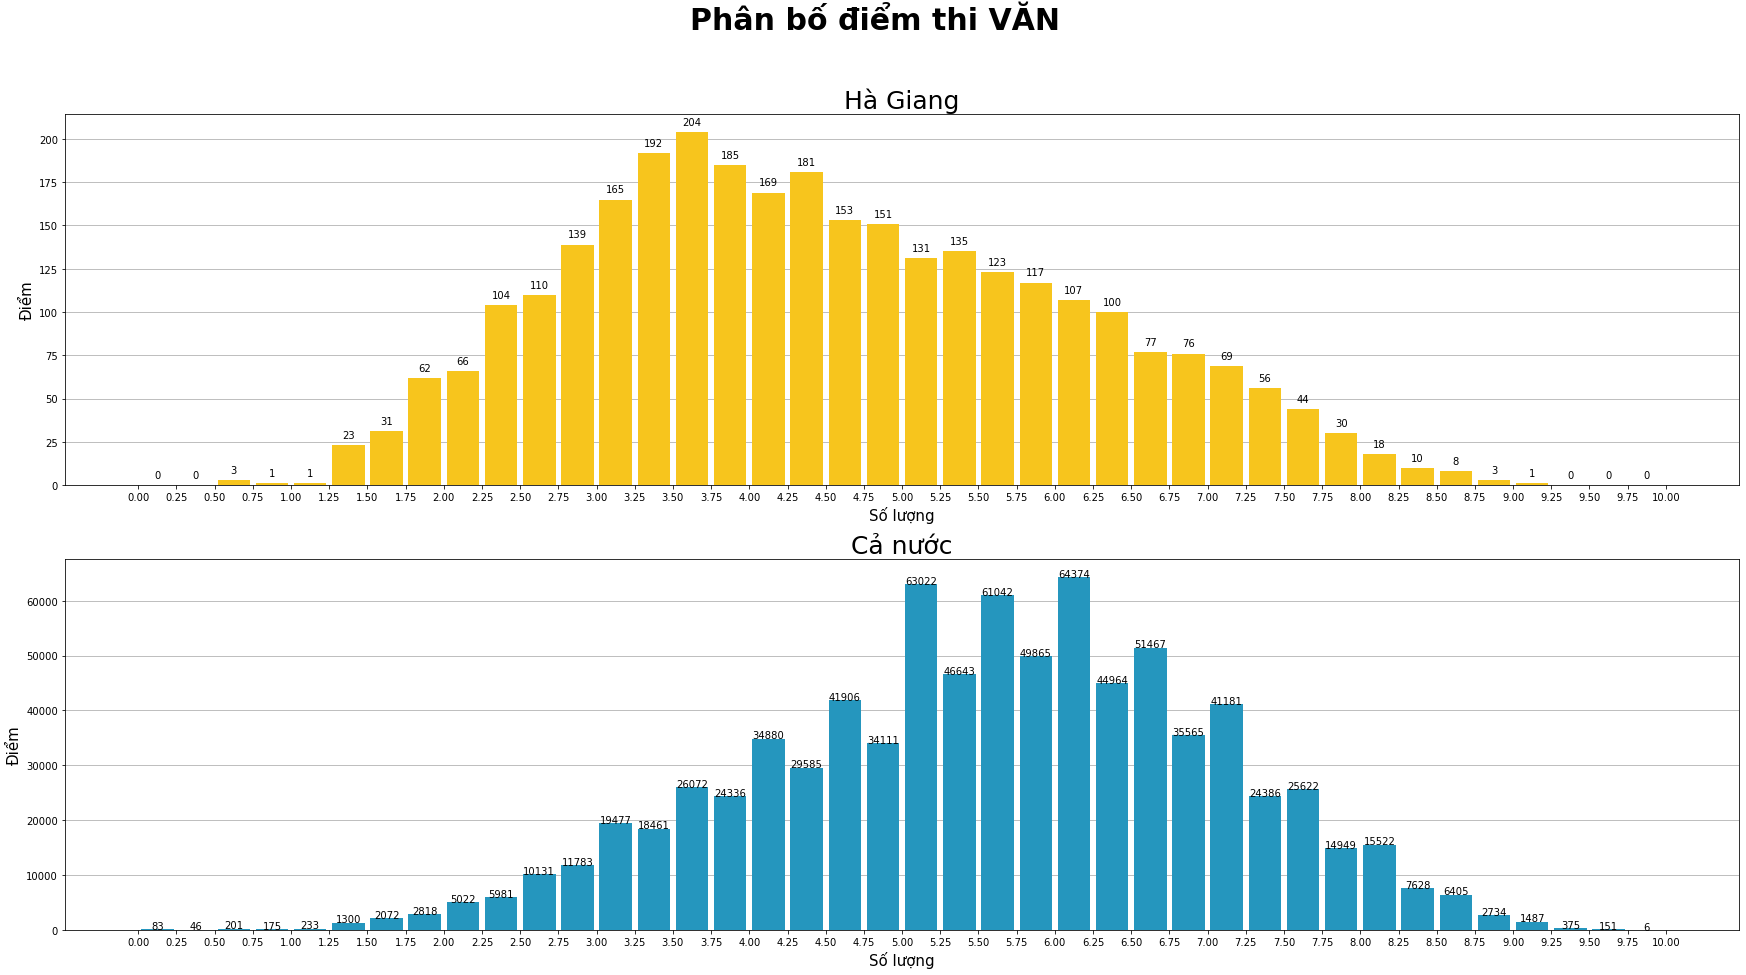

In [28]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'VĂN')

__Nhận xét:__
- Điểm trung bình của các thí sinh khoảng từ 3 đến 4 (dưới trung bình), và thấp hơn cả nước.

### Ngoại ngữ

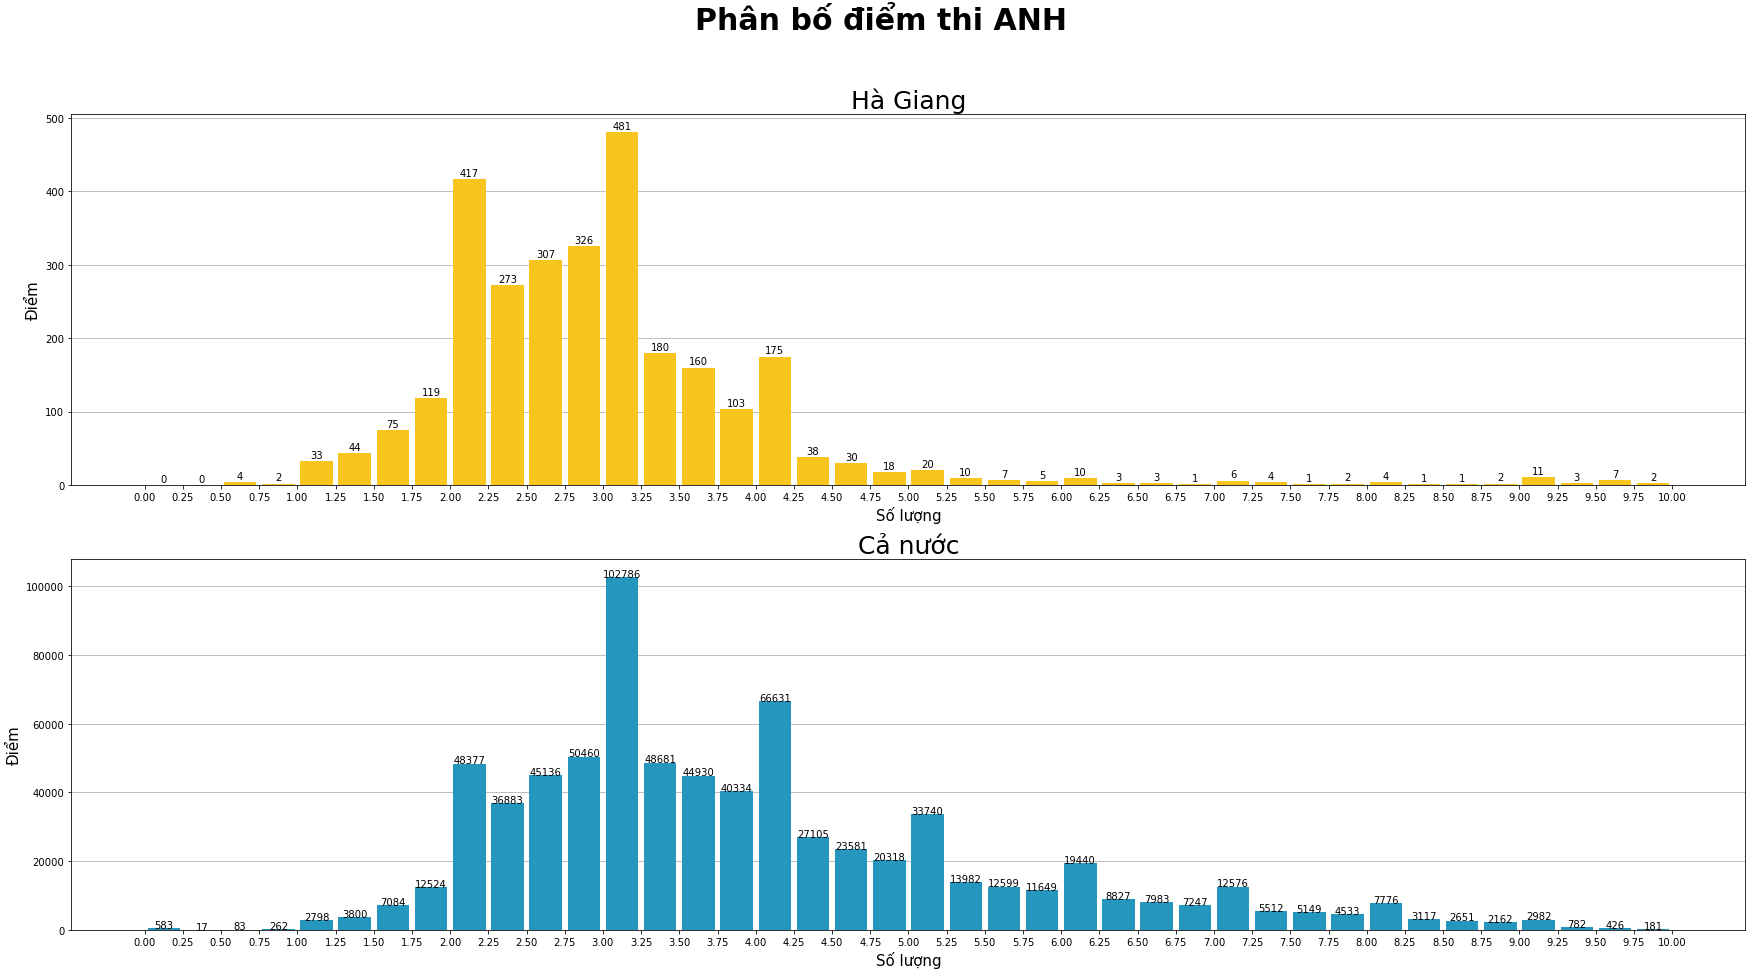

In [29]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'ANH')

### Vật lý

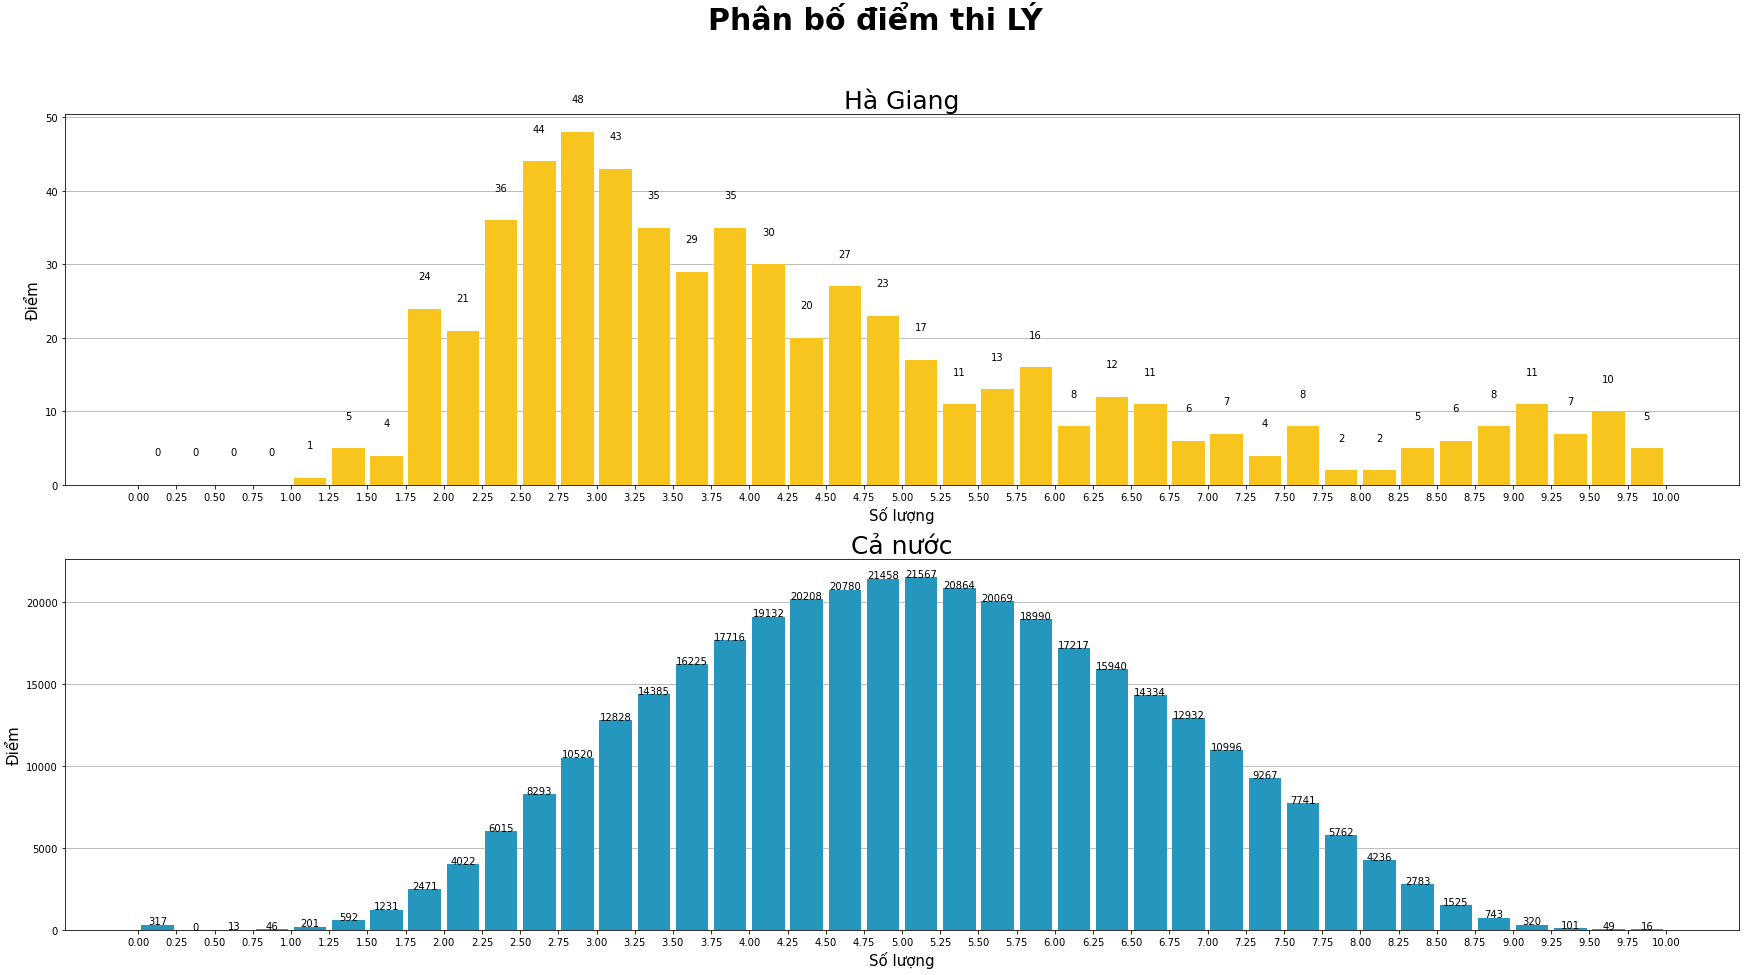

In [30]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'LÝ')

### Hóa học

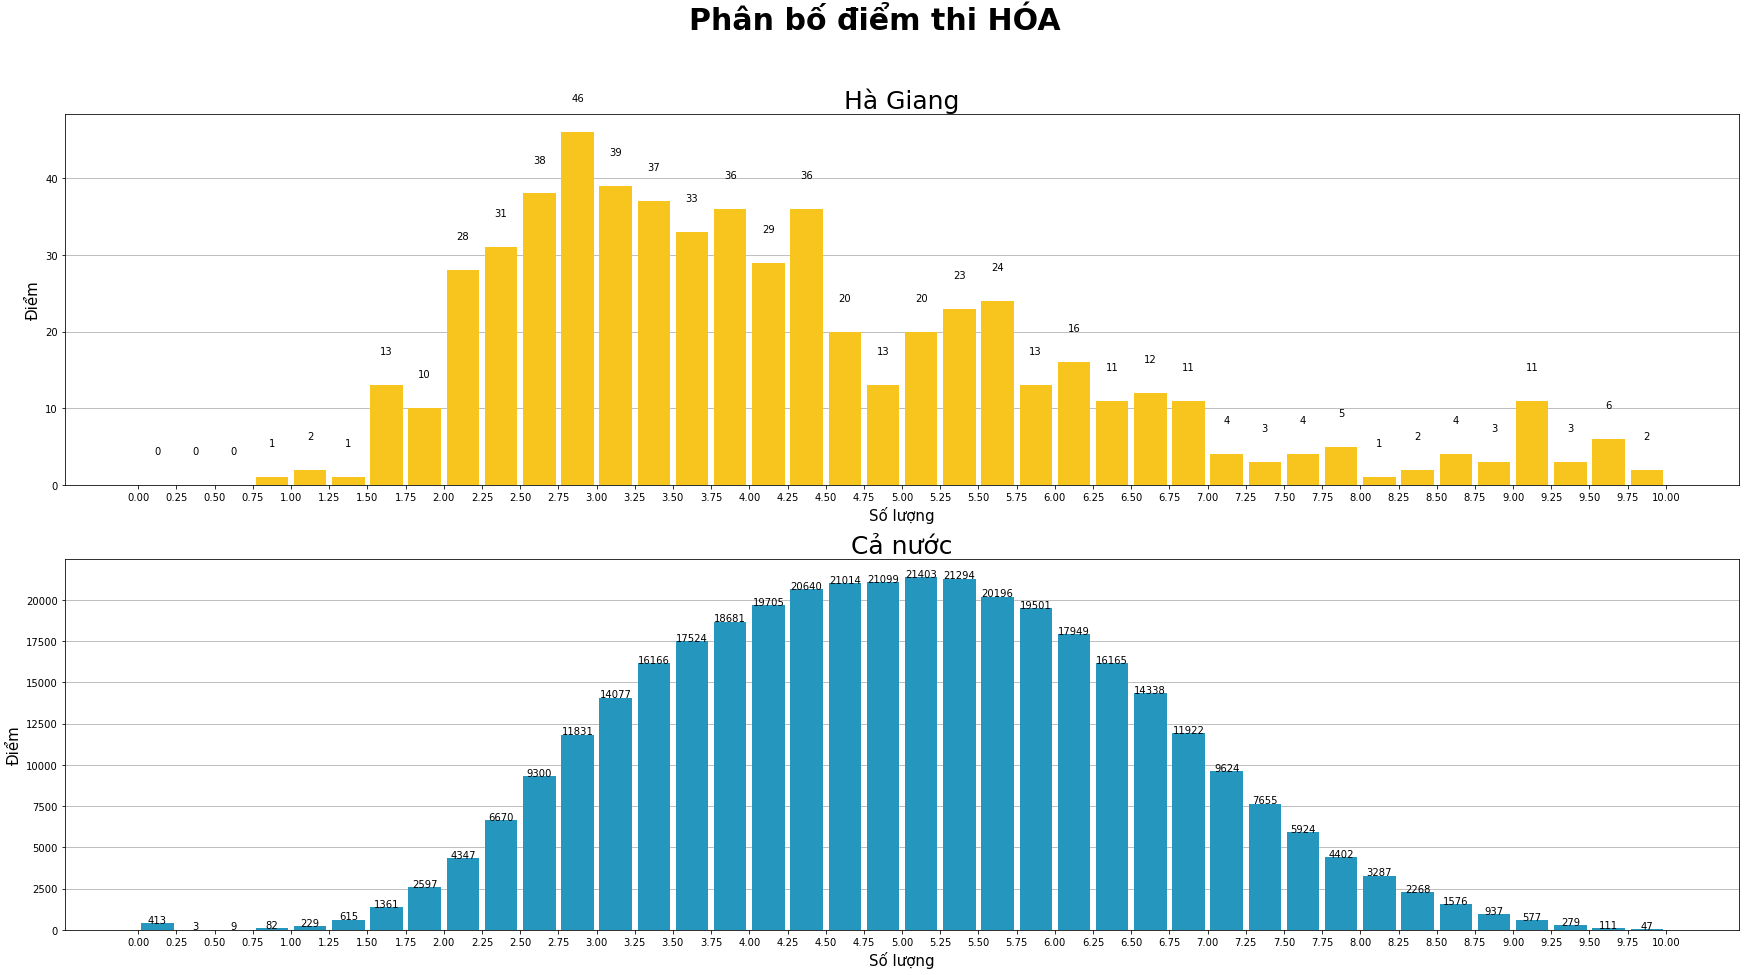

In [31]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'HÓA')

### Sinh học

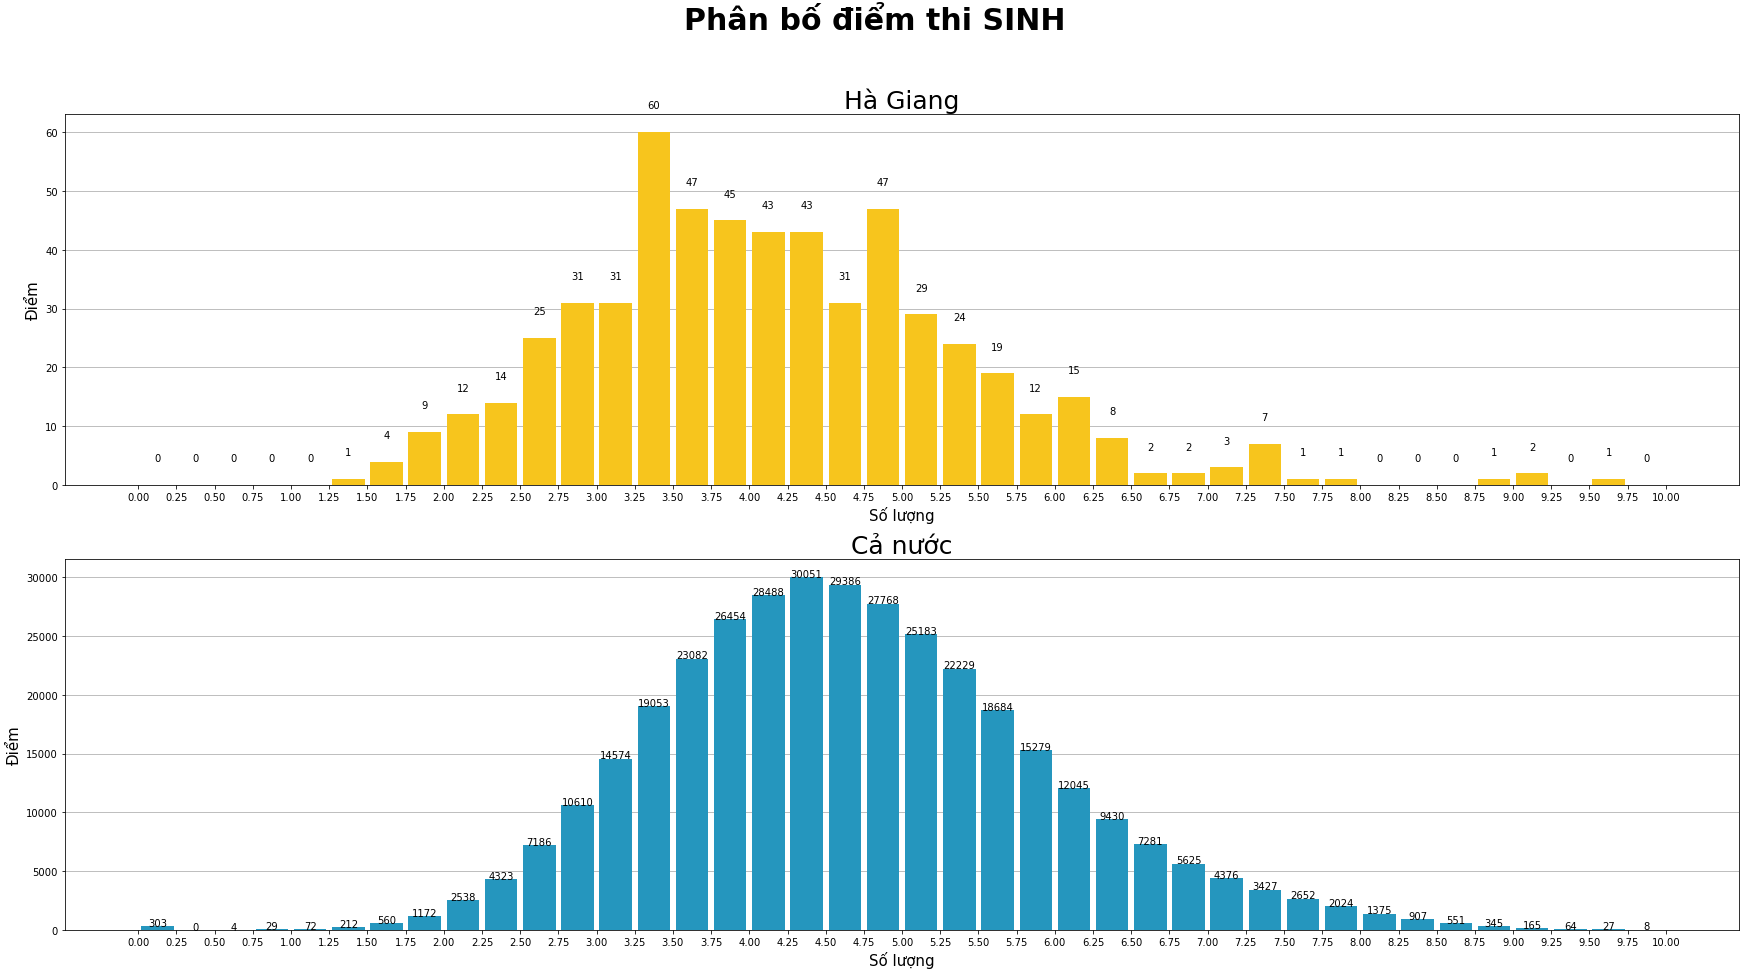

In [32]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'SINH')

### Lịch sử

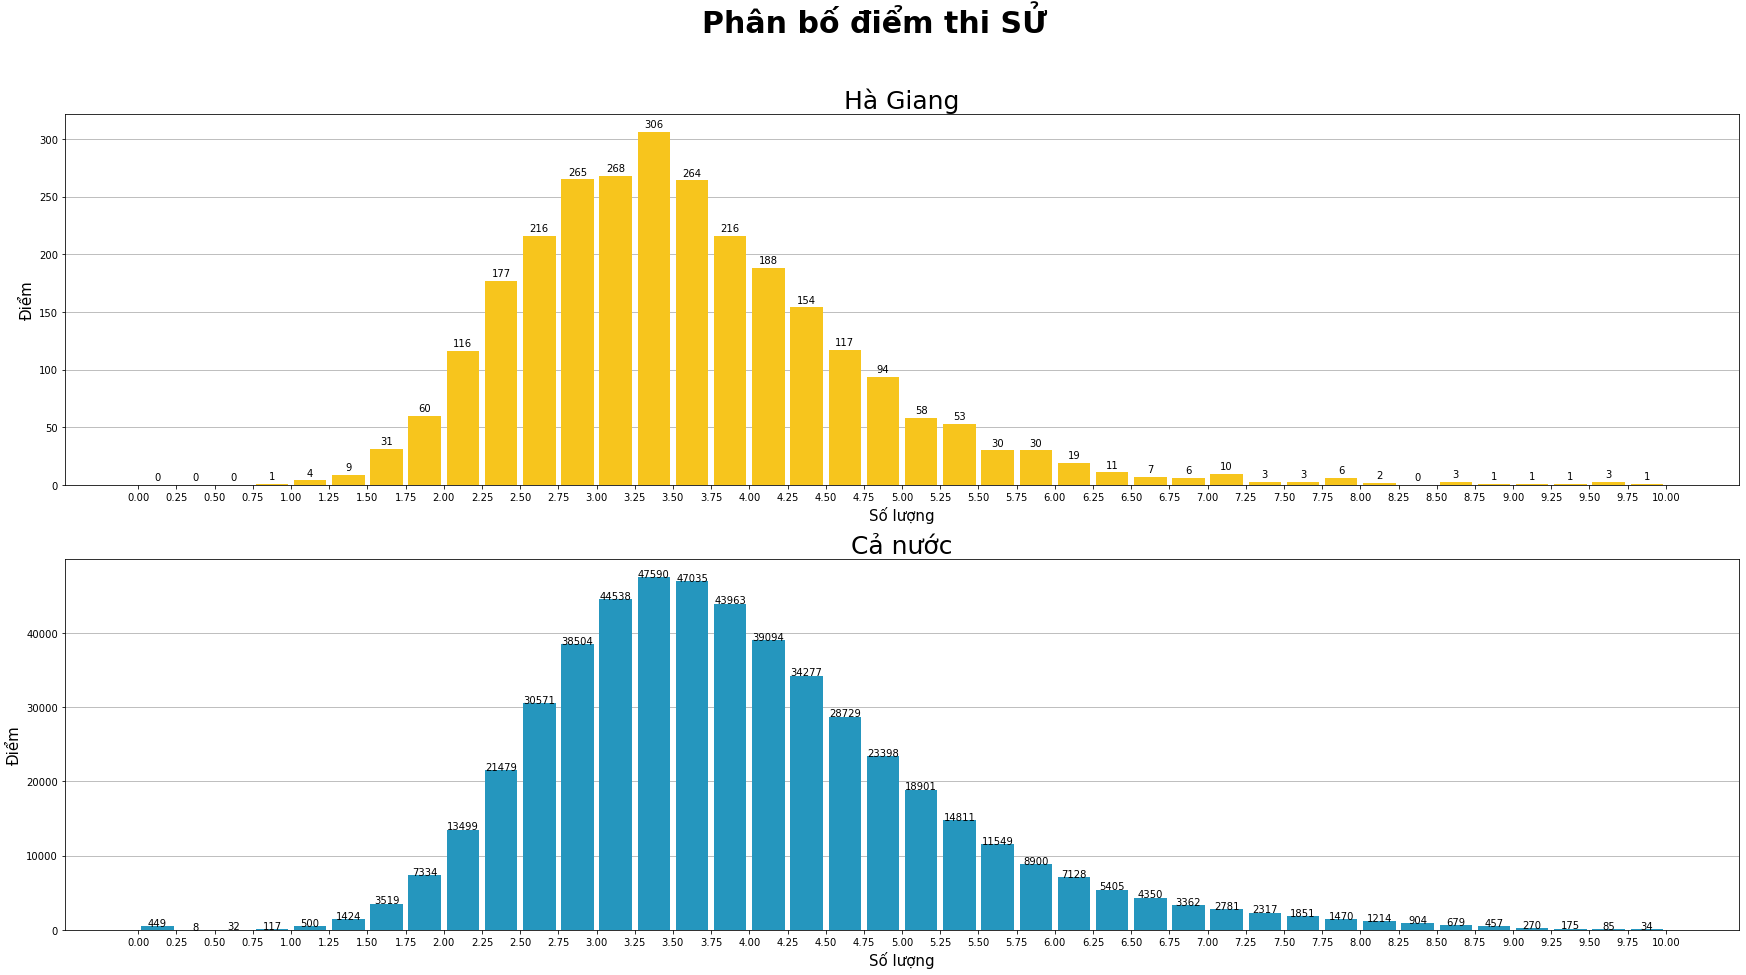

In [33]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'SỬ')

### Địa lý

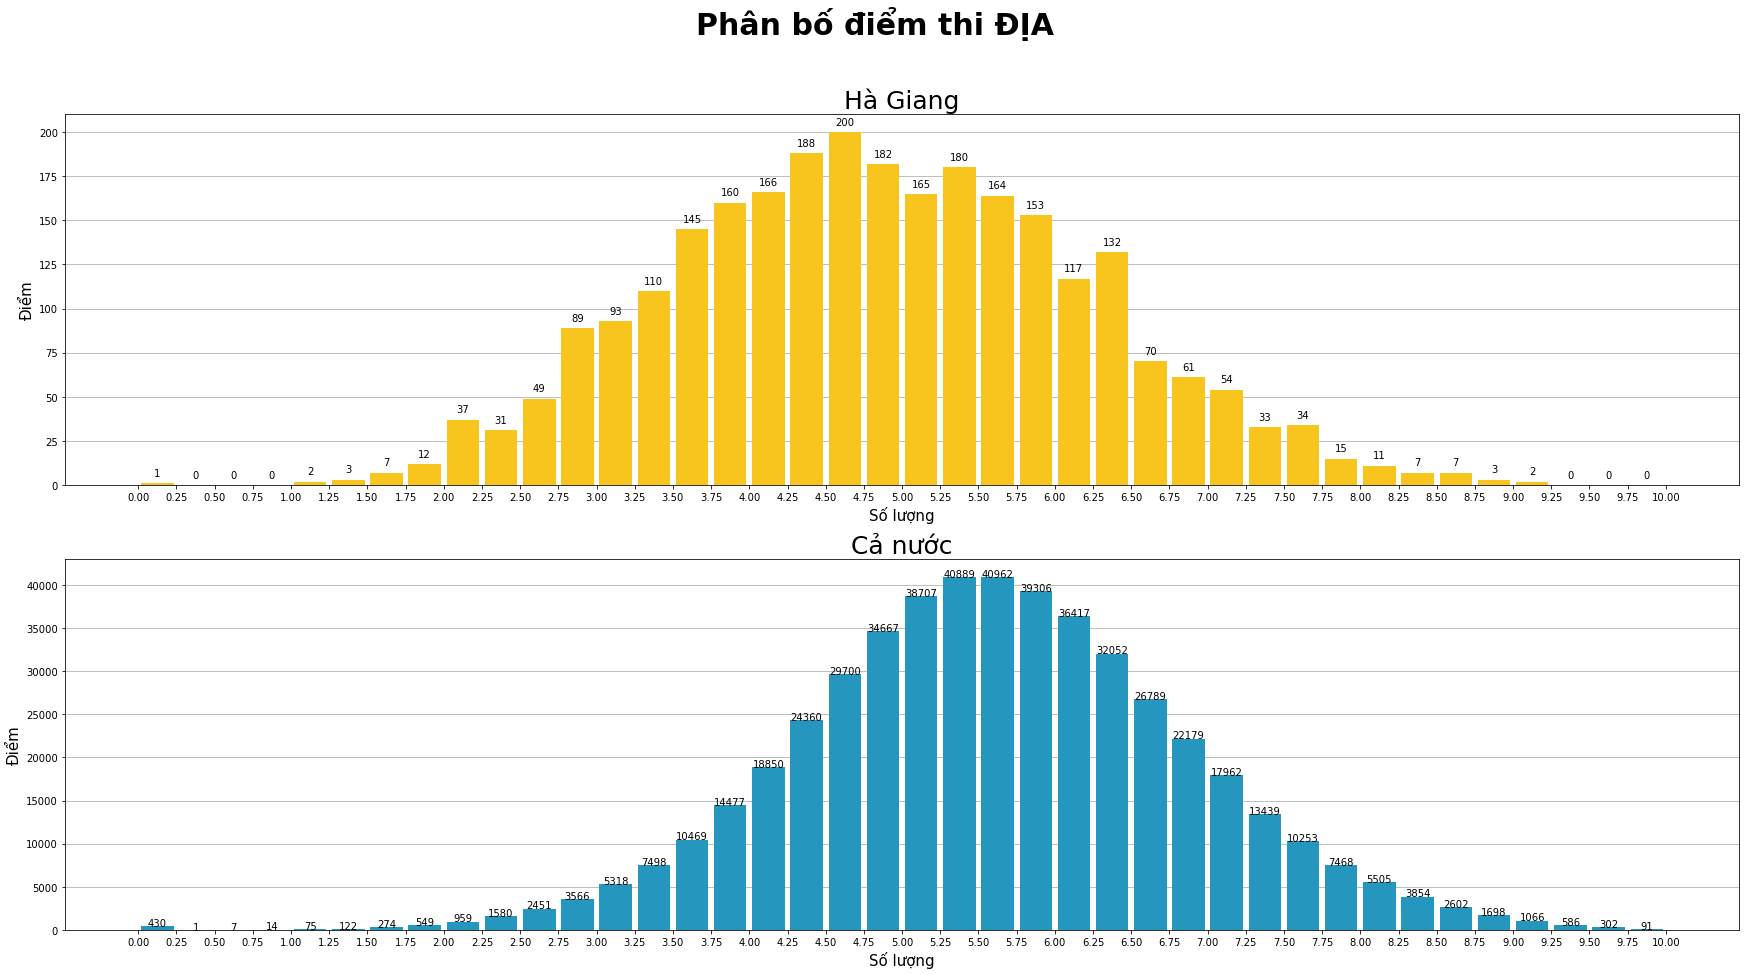

In [34]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'ĐỊA')

### Giáo dục công dân

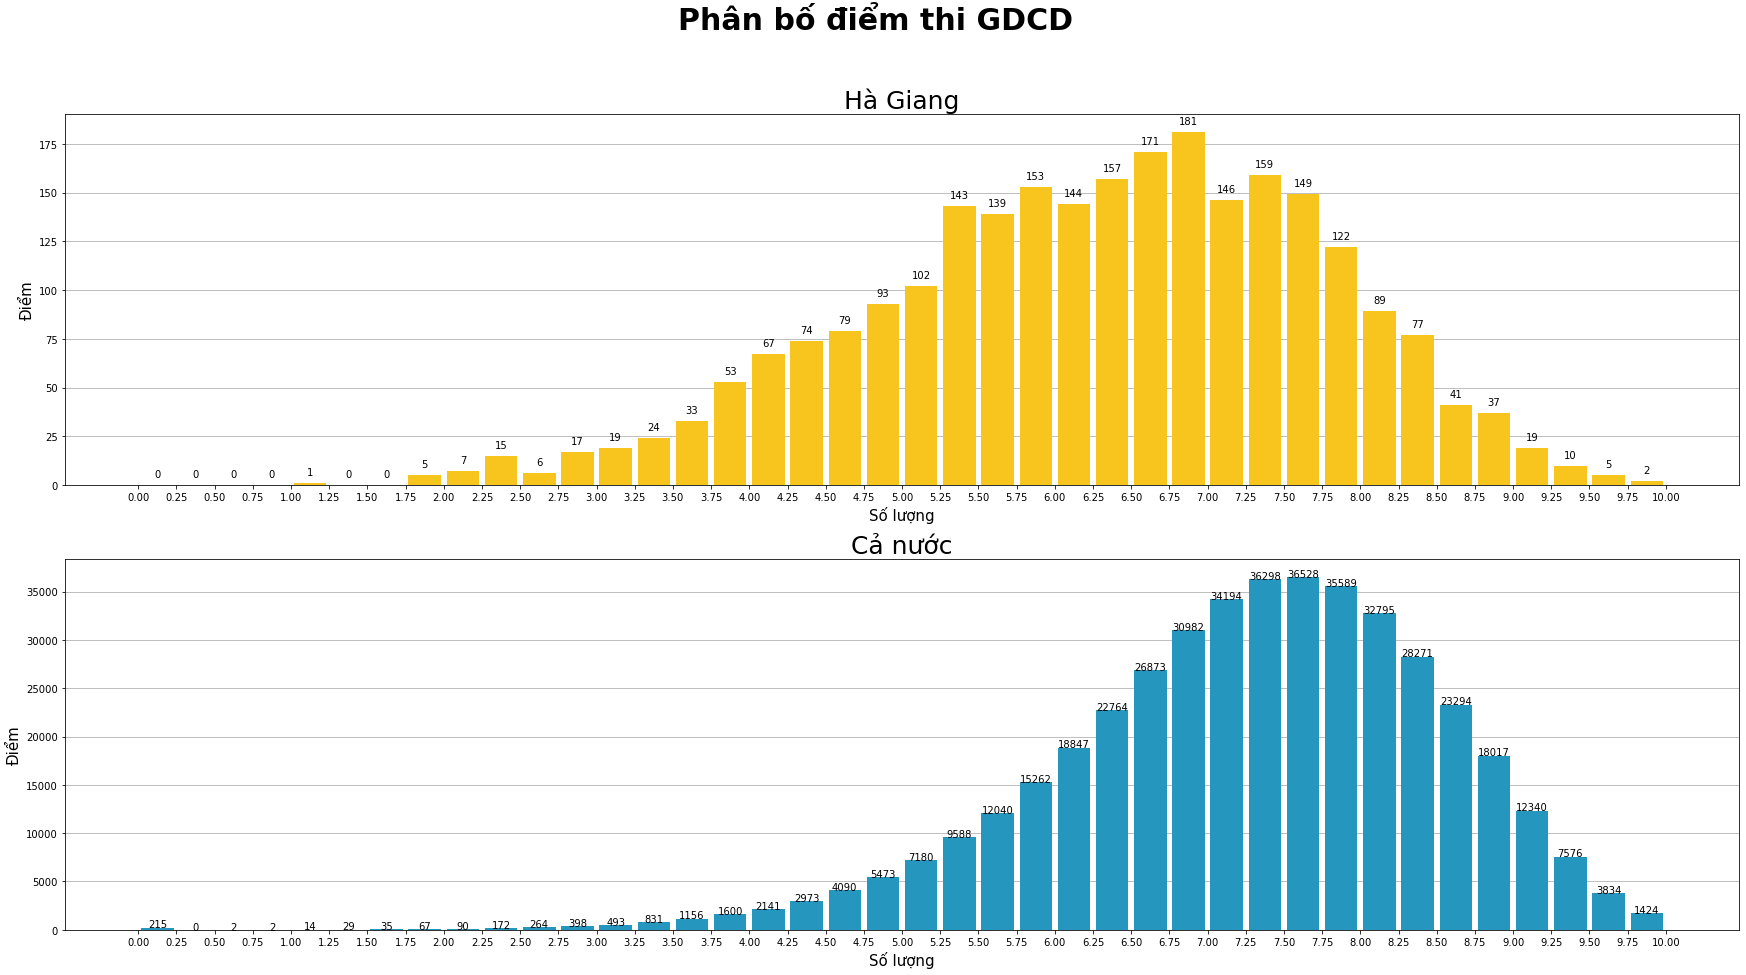

In [35]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'GDCD')

## Phân bố điểm thi các Khối thi
### Tự nhiên
#### Khối A

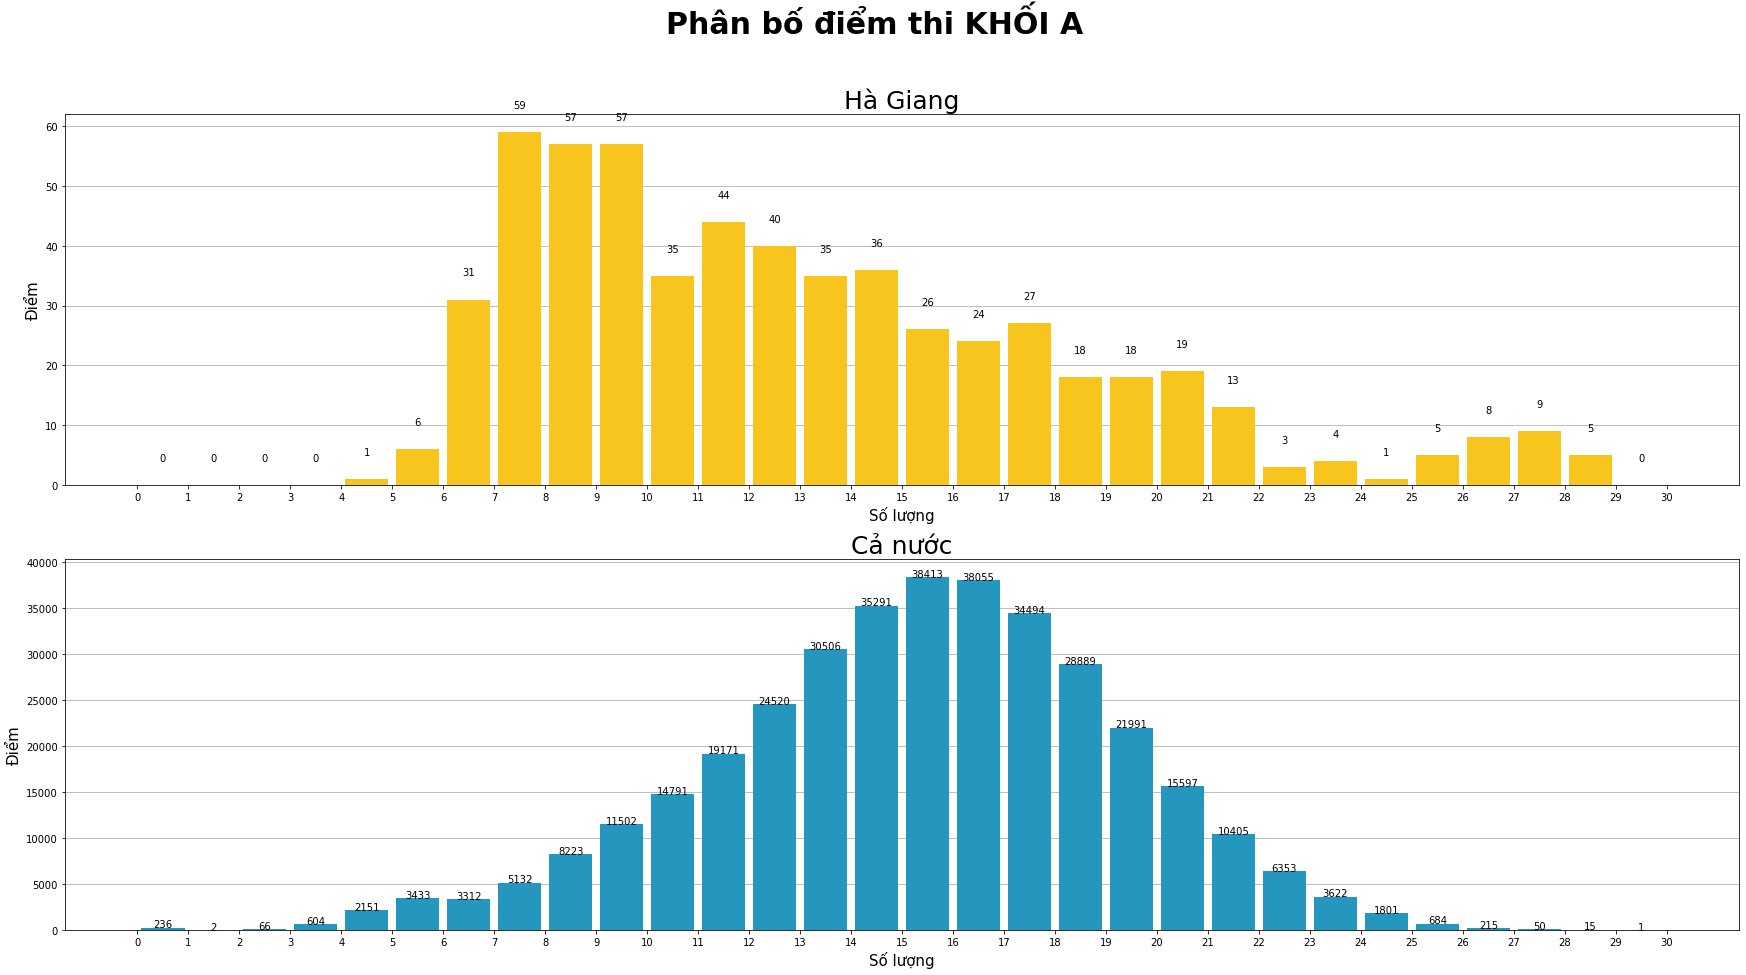

In [36]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI A', num_bins= 30, x_range = (0, 30))

#### Khối A1

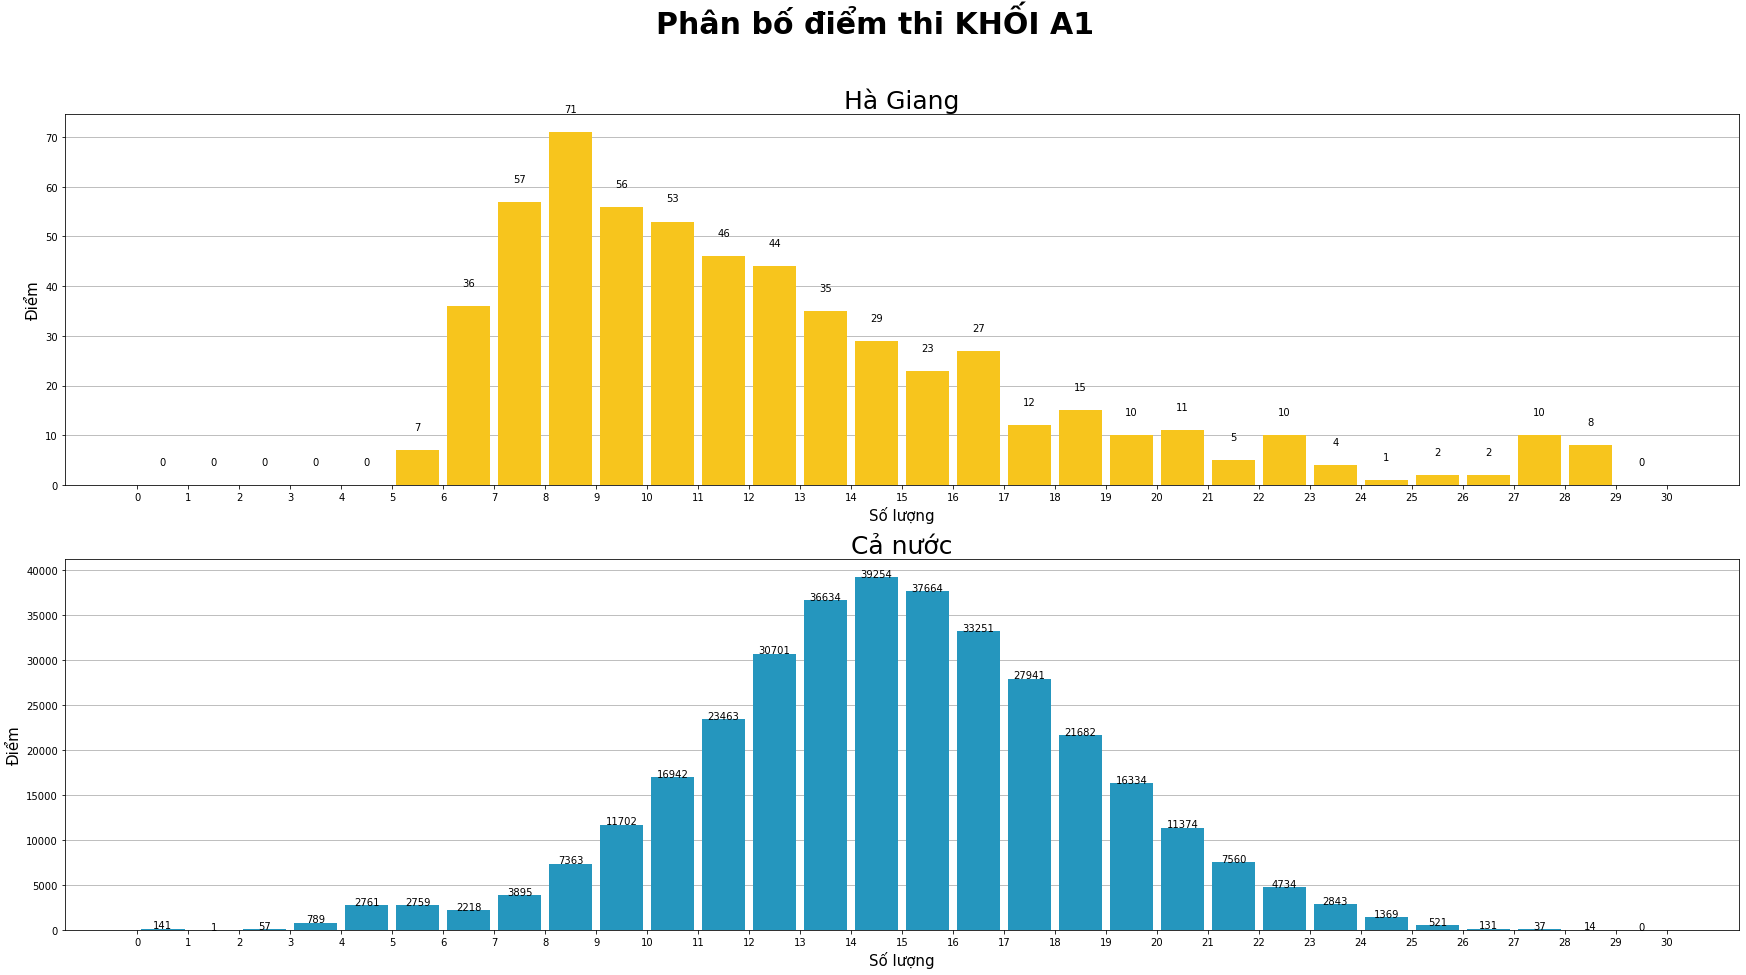

In [37]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI A1', num_bins= 30, x_range = (0, 30))

#### Khối B

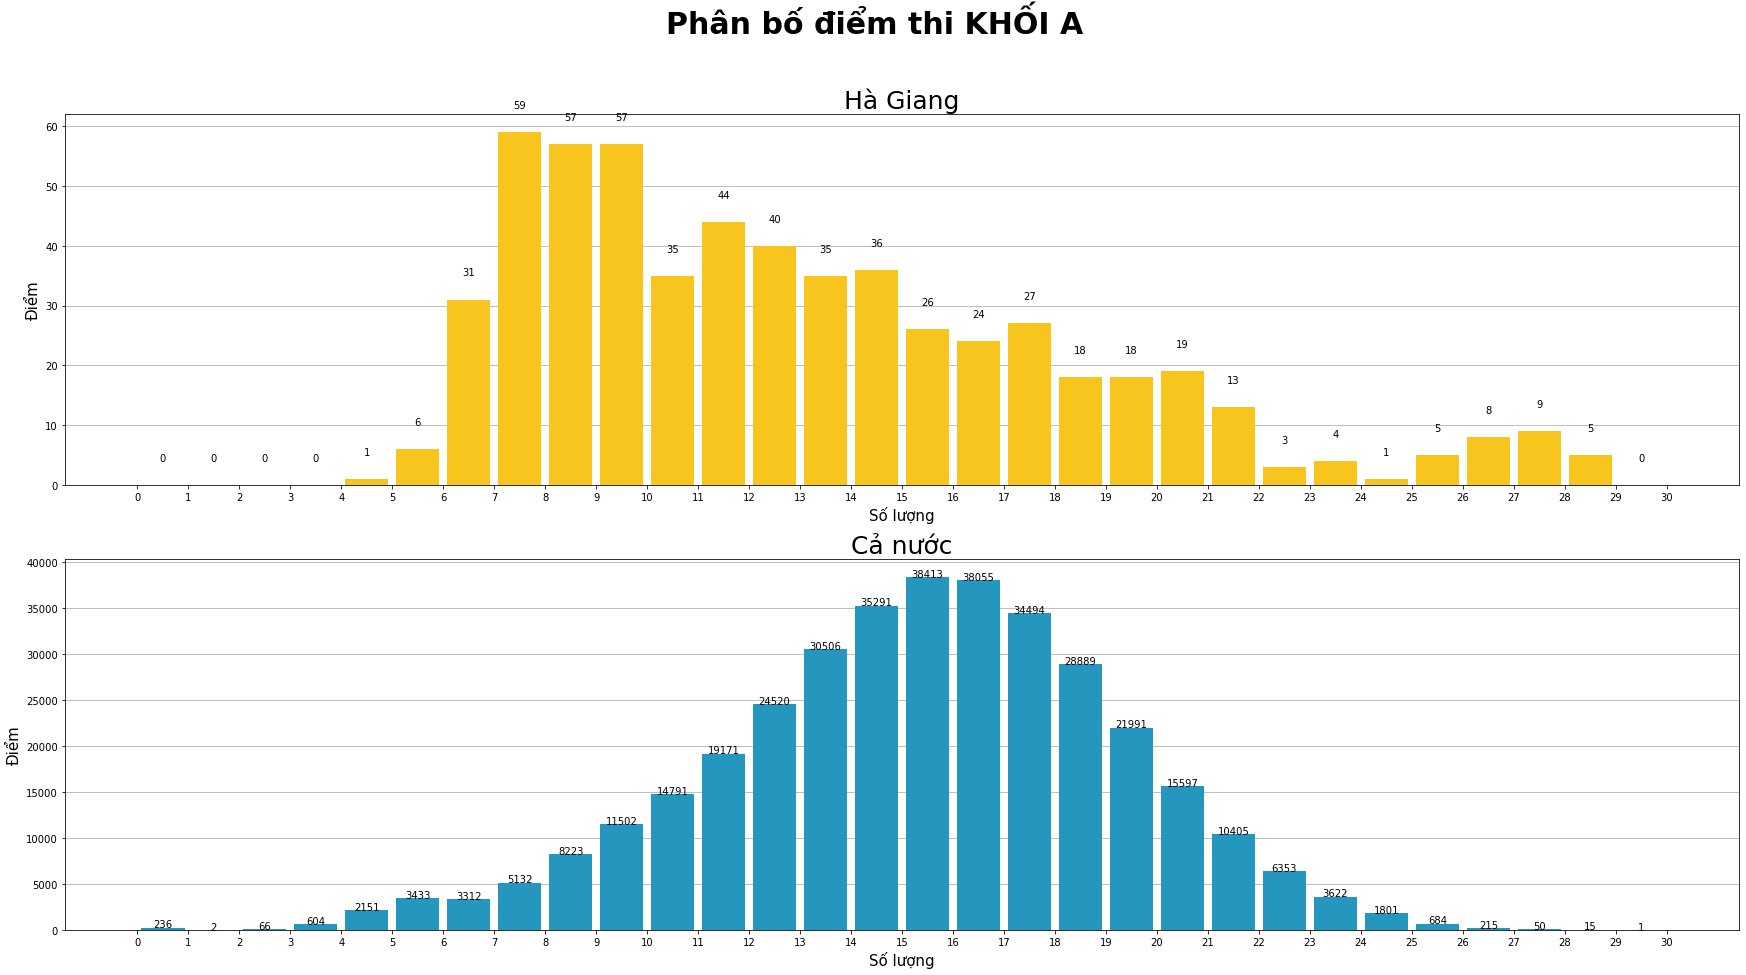

In [38]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI A', num_bins= 30, x_range = (0, 30))

### Xã hội
#### Khối C

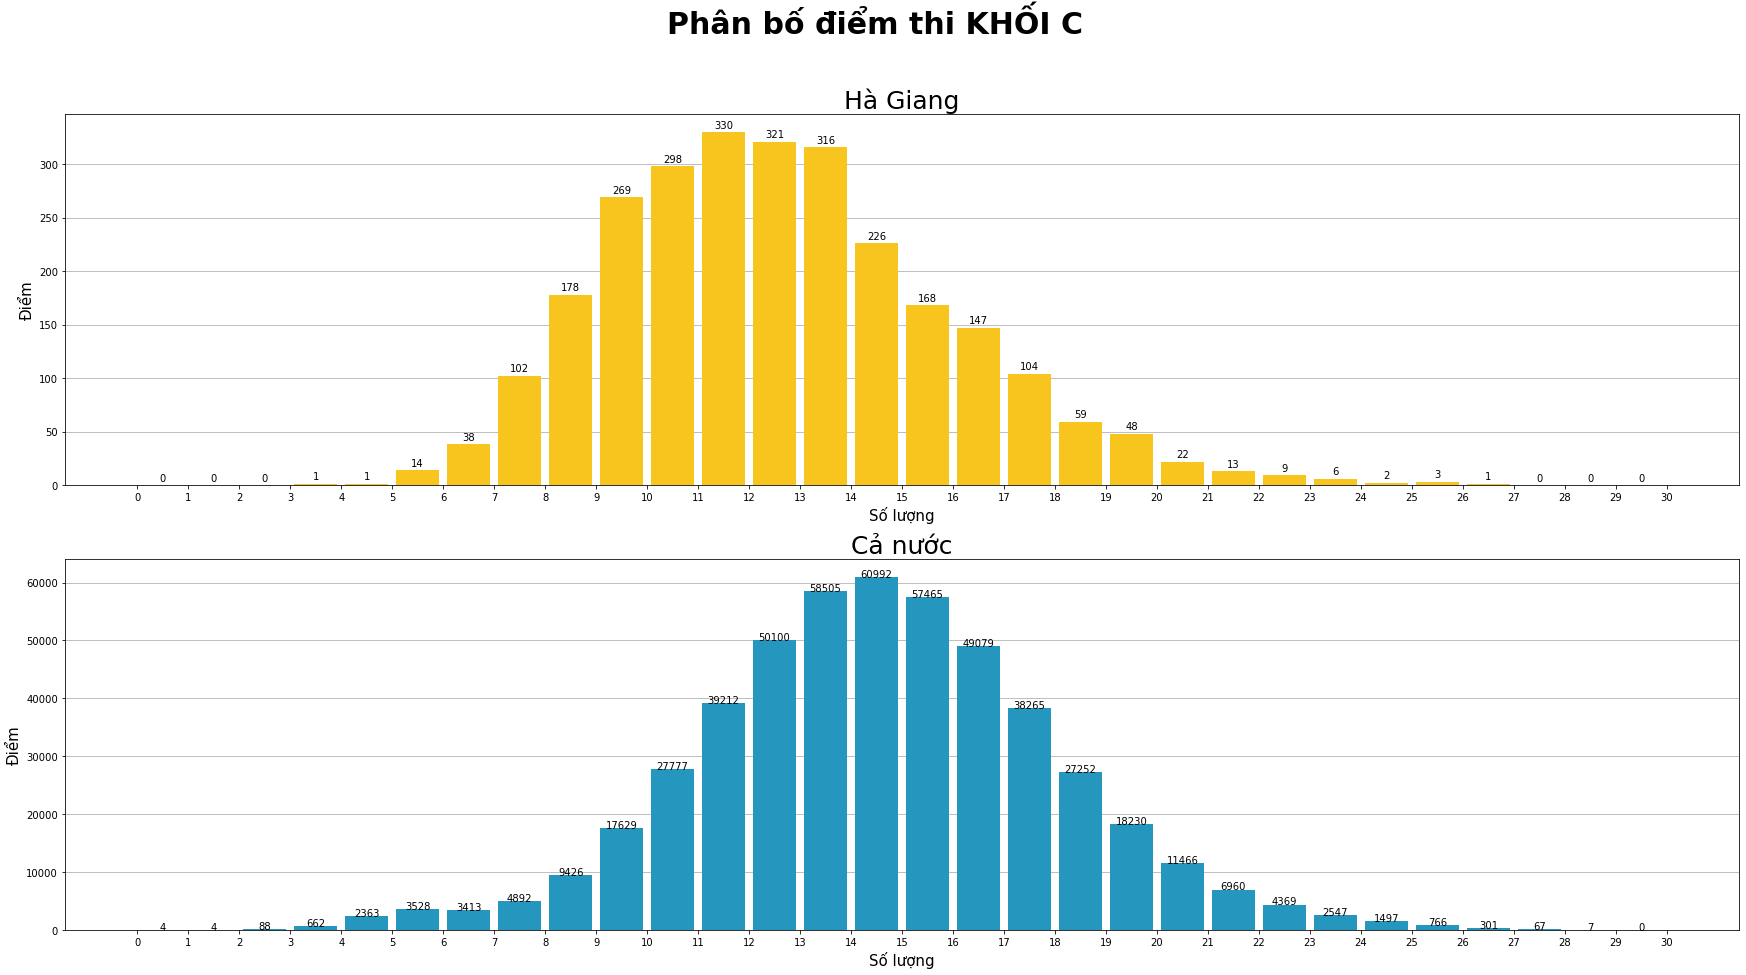

In [39]:
draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI C', num_bins= 30, x_range = (0, 30))

#### Khối D

In [45]:
data['Cả nước']['KHỐI D'].to_csv('khoid.csv')
#draw_histogram_compare(DEFAULT_PROVINCE_NAME, 'Cả nước', 'KHỐI D')

0         9.1
1          10
2          11
3        10.1
4        11.6
        ...  
9270    15.05
9271     16.5
9272    18.85
9273    19.15
9274    17.15
Name: KHỐI D, Length: 844122, dtype: object